In [174]:
import pandas as pd
#pip install googletrans
from googletrans import Translator
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
import re, string
import pickle
from nltk.tokenize import word_tokenize
import datetime as dt
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Import spanish twitts

In [68]:
## Import csv twitts in Spanish
es_twitts=pd.read_csv('C:\\input\\es_twitts.csv')

## Filtering by only MX
#es_twitts.query("country_code=='MX'").count()
es_twitts=es_twitts.query("country_code=='MX'")

In [227]:
es_twitts.head(5)

,created_at,screen_name,text,retweet_count,country_code,followers_count,lang,text_english,classified
0,2020-03-05T21:32:31Z,geekociety,“Larga vida y prosperidad.”\nCoronavirusOutbre...,3,MX,1497,es,"""Long life and prosperity.""\nCoronavirusOutbre...",Positive
1,2020-03-05T23:16:27Z,sof_cervon,Lo nuestro es un amor a prueba de Covid_19 🇩🇪❤️🇲🇽,0,MX,72,es,Ours is a love tested by Covid_19 🇩🇪❤️🇲🇽,Positive
2,2020-03-06T07:42:18Z,MiriamLaGober,Que es un virus? coronavirus CoronavirusOutbre...,1,MX,690,es,What is a virus? coronavirus CoronavirusOutbre...,Negative
3,2020-03-06T18:06:19Z,adriano_dreamer,Godinear en tiempos del Covid_19 👀 https://t.c...,0,MX,1546,es,Godinear in times of Covid_19 👀 https://t.co/B...,Negative
4,2020-03-07T03:59:14Z,EriitheD,Like si lo del Covid_19 en Colombia les parece...,372,MX,54858,es,Like if the Covid 19 in Colombia seems like a ...,Negative


# Twitts translation from Spanish to English

In [84]:
pd.options.mode.chained_assignment = None  # default='warn'
es_twitts['text_english'] = es_twitts['text'].apply(translator.translate, src='es', dest='en').apply(getattr, args=('text',))

In [86]:
## Export csv twitts traslated in English
#es_twitts.to_csv (r'C:\input\english_twitts.csv', index = None, header=True)

In [105]:
## Import csv twitts in Spanish
es_twitts=pd.read_csv('C:\\input\\english_twitts.csv')

# Removing Noise from the Data

In [216]:
def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('https?:\/\/.*[\r\n]*','', token)
        token = re.sub('http?:\/\/.*[\r\n]*','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

# Load Sentiment Model Trained and Tested

In [107]:
# To load:
f = open('sentiment_classifier.pickle', 'rb')
classifier = pickle.load(f)
f.close()

# Run model to classify twitts

In [108]:
for index, row in es_twitts.iterrows():
    #print(index)
    #print(row['created_at'],row['text'],row['text_english'])
        
    custom_tokens = remove_noise(word_tokenize(row['text_english']))
    
    es_twitts.at[index,'classified']=classifier.classify(dict([token, True] for token in custom_tokens))

In [109]:
es_twitts

,created_at,screen_name,text,retweet_count,country_code,followers_count,lang,text_english,classified
0,2020-03-05T21:32:31Z,geekociety,“Larga vida y prosperidad.”\nCoronavirusOutbre...,3,MX,1497,es,"""Long life and prosperity.""\nCoronavirusOutbre...",Positive
1,2020-03-05T23:16:27Z,sof_cervon,Lo nuestro es un amor a prueba de Covid_19 🇩🇪❤️🇲🇽,0,MX,72,es,Ours is a love tested by Covid_19 🇩🇪❤️🇲🇽,Positive
2,2020-03-06T07:42:18Z,MiriamLaGober,Que es un virus? coronavirus CoronavirusOutbre...,1,MX,690,es,What is a virus? coronavirus CoronavirusOutbre...,Negative
3,2020-03-06T18:06:19Z,adriano_dreamer,Godinear en tiempos del Covid_19 👀 https://t.c...,0,MX,1546,es,Godinear in times of Covid_19 👀 https://t.co/B...,Negative
4,2020-03-07T03:59:14Z,EriitheD,Like si lo del Covid_19 en Colombia les parece...,372,MX,54858,es,Like if the Covid 19 in Colombia seems like a ...,Negative
...,...,...,...,...,...,...,...,...,...
15137,2020-04-01T23:38:39Z,LaG0mez,Ya murio otra persona en Sinaloa por covid19 a...,0,MX,479,es,Another person has already died in Sinaloa by ...,Positive
15138,2020-04-01T23:39:31Z,ferelgar,Construccion de politicas publicas en tiempos ...,1,MX,2146,es,Construccion de politicas publicas en tiempos ...,Positive
15139,2020-04-01T23:41:31Z,MacuilXchitl,La situacion social en Puebla se ha deteriorad...,0,MX,1253,es,The social situation in Puebla has deteriorate...,Positive
15140,2020-04-01T23:43:08Z,OscarafaNovella,"Firme, junto con un grupo de politicos integra...",0,MX,289,es,"Sign, together with a group of politicians int...",Negative


In [154]:
## Export csv twitts traslated in English
#es_twitts.to_csv (r'C:\input\classified_twitts.csv', index = None, header=True)

## Import csv twitts traslated in English
es_twitts=pd.read_csv('C:\\input\\classified_twitts.csv')

In [156]:
# Imporing the necessary columns to plot
es_twitts_plot = pd.DataFrame()

es_twitts_plot["created_at"]=es_twitts.created_at
#es_twitts_plot["spa"]=es_twitts.text
#es_twitts_plot["eng"]=es_twitts.text_english

es_twitts_plot.loc[es_twitts['classified'].str.contains('Positive'), 'pos'] = 'yes'
es_twitts_plot.loc[es_twitts['classified'].str.contains('Negative'), 'neg'] = 'yes'

In [157]:
es_twitts_plot.head(5)

,created_at,pos,neg
0,2020-03-05T21:32:31Z,yes,NaN
1,2020-03-05T23:16:27Z,yes,NaN
2,2020-03-06T07:42:18Z,NaN,yes
3,2020-03-06T18:06:19Z,NaN,yes
4,2020-03-07T03:59:14Z,NaN,yes


In [158]:
pd.options.mode.chained_assignment = None  # default='warn'

# Coverting all date values in proper Datetime format
for i in range(len(es_twitts_plot.created_at)):
     es_twitts_plot.created_at[i] = dt.datetime.strptime(es_twitts_plot.created_at[i],'%Y-%m-%dT%H:%M:%SZ').date()

In [159]:
# Add new columns to get positive/negavite counts per day
es_twitts_plot['count_pos']  = es_twitts_plot.groupby('created_at')['pos'].transform('count')
es_twitts_plot['count_neg'] = es_twitts_plot.groupby('created_at')['neg'].transform('count')

es_twitts_plot.drop(['pos', 'neg'],axis=1,inplace=True)
es_twitts_plot.drop_duplicates(inplace=True)

In [160]:
es_twitts_plot.head(10)

,created_at,count_pos,count_neg
0,2020-03-05,2,0
2,2020-03-06,0,2
4,2020-03-07,0,1
5,2020-03-08,1,1
7,2020-03-09,2,2
11,2020-03-10,16,12
39,2020-03-11,54,37
130,2020-03-12,205,165
500,2020-03-13,572,482
1554,2020-03-14,258,243


# Plotting twitts Classified

In [165]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=es_twitts_plot['created_at'], y=es_twitts_plot['count_pos'], name="Positive",
                         line_color='deepskyblue'))

fig.add_trace(go.Scatter(x=es_twitts_plot['created_at'], y=es_twitts_plot['count_neg'], name="Negative",
                         line_color='dimgray'))

fig.update_layout(title_text='MX Twitts Positive/Negative Per Day',
                  xaxis_rangeslider_visible=True)
fig.show()

# Word Cloud By Twitts Classified

In [221]:
pos_twitts=es_twitts.query('classified=="Positive"')
neg_twitts=es_twitts.query('classified=="Negative"')

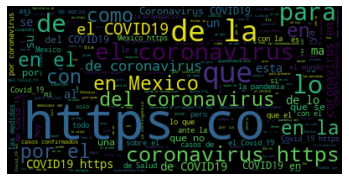

In [226]:
#text = df.description[0]
text = (" ").join(pos_twitts.text.tolist())

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

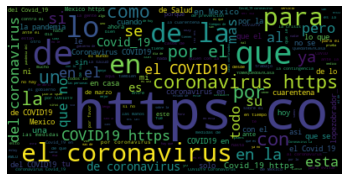

In [225]:
#text = df.description[0]
text = (" ").join(neg_twitts.text.tolist())

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()